In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
import os
os.chdir("C:\\Users\kpriyadh\\Documents\\PGP-DSBA\Module II - Statistical Methods for Decision Making\\Project")
df=pd.read_csv("Wholesale+Customers+Data.csv")

In [3]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


# A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

# 1.1 Use methods of descriptive statistics to summarize data. 
# Which Region and which Channel seems to spend more? 
# Which Region and which Channel seems to spend less?

In [5]:
df["Total"]=df["Fresh"]+df["Milk"]+df["Grocery"]+df["Frozen"]+df["Detergents_Paper"]+df["Delicatessen"]

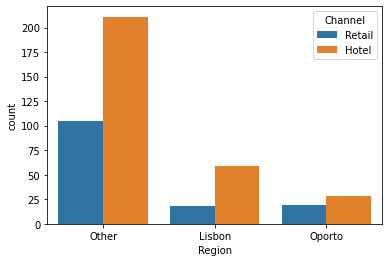

In [6]:
#df.hist(by='Region',column = 'Total', figsize=(20,30))
sns.countplot(x="Region", hue="Channel", data=df)

 From the above bar graph, it is evident that,
 #'Other' Region and 'Hotel' Channel seems to spend more ;
 #'Lisbon' Region and 'Retail' Channel seems to spend less

# 1.2 There are 6 different varieties of items are considered.
# Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer

In [8]:
pd.pivot_table(df, index=['Region'],
                     columns=['Channel'])

Buyer/Spender             Delicatessen              Detergents_Paper  \
Channel         Hotel      Retail        Hotel       Retail            Hotel   
Region                                                                         
Lisbon     237.728814  226.055556  1197.152542  1871.944444       950.525424   
Oporto     321.000000  311.105263  1105.892857  1239.000000       482.714286   
Other      227.582938  152.438095  1518.284360  1826.209524       786.682464   

                             Fresh                    Frozen               \
Channel       Retail         Hotel       Retail        Hotel       Retail   
Region                                                                      
Lisbon   8225.277778  12902.254237  5200.000000  3127.322034  2584.111111   
Oporto   8410.263158  11650.535714  7289.789474  5745.035714  1540.578947   
Other    6899.238095  13878.052133  9831.504762  3656.900474  1513.200000   

             Grocery                       Milk                       Total  \
Channel        Hotel        Retail        Hotel        Retail         Hotel   
Region                                                                        
Lisbon   4026.135593  18471.944444  3870.203390  10784.000000  26073.593220   
Oporto   4395.500000  16326.315789  2304.250000   9190.789474  25683.928571   
Other    3886.734597  15953.809524  3486.981043  10981.009524  27213.635071   

                       
Channel        Retail  
Region                 
Lisbon   47137.277778  
Oporto   43996.736842  
Other    47004.971429

From the pivot table,          minimum           &      maximum for,
        Item Fresh:            Lisbon(Retail)    &      Other(Hotel)
        Item Frozen:           Other(Retail)     &      Oporto(Hotel)
        Item Grocery:          Lisbon(Hotel)     &      Lisbon(Retail)
        Item Milk:             Oporto(Hotel)     &      Other(Retail)
        Item Detergents_Paper: Oporto(Hotel)     &      Lisbon(Retail)
        Item Delicatessen:     Oporto(Hotel)     &      Lisbon(Retail)
        
Hence it is clear that all varieties DO NOT show similar behaviour across Region and Channel respectively. 

# 1.3 On the basis of a descriptive measure of variability, 
# Which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

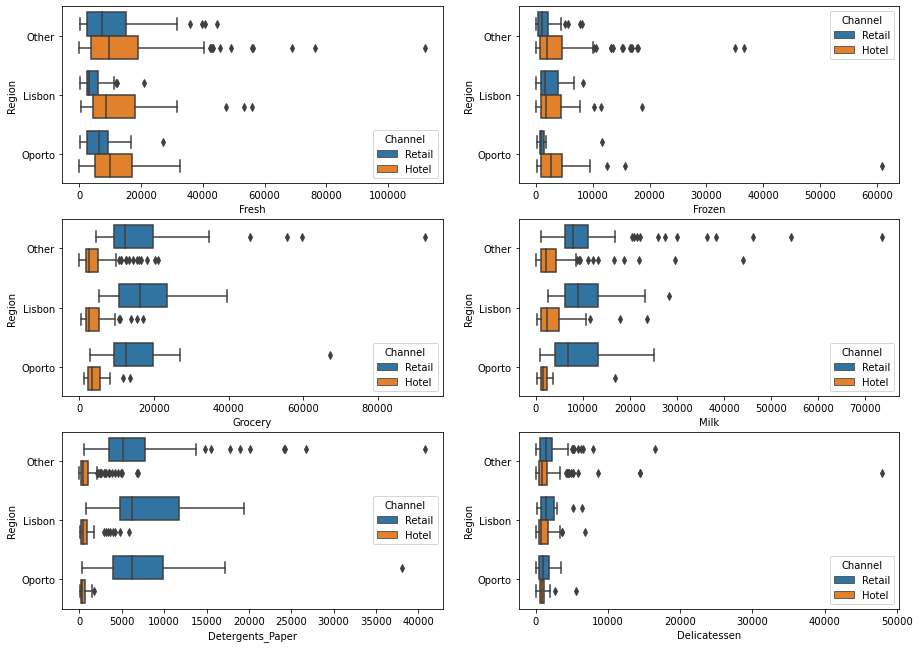

In [78]:
plt.figure(figsize= (15,15))
plt.subplot(4,2,1)
sns.boxplot(x= df.Fresh, y=df.Region,hue=df.Channel)

plt.subplot(4,2,2)
sns.boxplot(x= df.Frozen, y=df.Region,hue=df.Channel)

plt.subplot(4,2,3)
sns.boxplot(x= df.Grocery, y=df.Region,hue=df.Channel)

plt.subplot(4,2,4)
sns.boxplot(x= df.Milk, y=df.Region,hue=df.Channel)

plt.subplot(4,2,5)
sns.boxplot(x= df.Detergents_Paper, y=df.Region,hue=df.Channel)

plt.subplot(4,2,6)
sns.boxplot(x= df.Delicatessen, y=df.Region,hue=df.Channel)

plt.show()

From the above box plot it is clear that, 
Item 'Fresh' is almost normally distributed and hence it shows most consistent behaviour
Item 'Detergents_Paper' is highly right skewed and hence it shows least consistent behaviour

# 1.4 Are there any outliers in the data?

Yes - there are outliers in all the items as shown by the above box plot

# 1.5 On the basis of your analysis, what are your recommendations for the business? 
# How can your analysis help the business to solve its problem? Answer from the business perspective

1. Spending on Hotel Channel is more than spending on Retail Channel
2. Items 'Fresh' is consistently purchased in Lisbon, Oporto whereas there is so much inconsistency in purchase of items like 'Detergents_Paper'
3. Business can focus on minimizing the amount spent on 'Milk,Frozen,Detergents_Paper,Fresh' in 'Other' Region as it has extreme outliers.
4. Retain Spend in Lisbon region for item Fresh can serve as benchmark for other items. 

# Question 2
# The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

In [14]:
mydata = pd.read_csv("Survey-1.csv")
mydata.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


### 2.1.1. Gender and Major

In [16]:
pd.crosstab(mydata['Gender'],mydata['Major'] )

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


### 2.1.2. Gender and Grad Intention

In [18]:
pd.crosstab(mydata['Gender'],mydata['Grad Intention'] )

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


### 2.1.3. Gender and Employment

In [20]:
pd.crosstab(mydata['Gender'],mydata['Employment'] )

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


### 2.1.4. Gender and Computer

In [22]:
pd.crosstab(mydata['Gender'],mydata['Computer'] )

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


# 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
# 2.2.1 What is the probability that a randomly selected CMSU student will be male?

In [24]:
mydata["Gender"].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [25]:
print("The probability that a randomly selected CMSU student will be male is {}".format(round(29/62,2)))

The probability that a randomly selected CMSU student will be male is 0.47


# 2.2.2 What is the probability that a randomly selected CMSU student will be female?

In [27]:
print("The probability that a randomly selected CMSU student will be male is {}".format(round(33/62,2)))

The probability that a randomly selected CMSU student will be male is 0.53


# 2.3. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question: 
# 2.3.1 Find the conditional probability of different majors among the male students in CMSU.

In [29]:
pd.crosstab(mydata['Gender'],mydata['Major'] )

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [30]:
print("The conditional probability of different majors among the male students in CMSU is {}".format(round(7/29,2)))

The conditional probability of different majors among the male students in CMSU is 0.24


In [31]:
print("The conditional probability of different majors among the female students in CMSU is {}".format(round(7/33,2)))

The conditional probability of different majors among the female students in CMSU is 0.21


# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

# 2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.

In [33]:
pd.crosstab(mydata['Gender'],mydata['Grad Intention'] )

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [34]:
print("The probability That a randomly chosen student is a male and intends to graduate is {}".format(round(17/29,2)))

The probability That a randomly chosen student is a male and intends to graduate is 0.59


# 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [36]:
pd.crosstab(mydata['Gender'],mydata['Computer'] )

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [142]:
print("The probability that a randomly chosen student is a female and does not have a laptop is {}".format(round(4/33,2)))

The probability that a randomly chosen student is a female and does not have a laptop is 0.12


# 2.5. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

# 2.5.1 Find the probability that a randomly chosen student is either a male or has a full-time employment

In [39]:
pd.crosstab(mydata['Gender'],mydata['Employment'] )

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [40]:
#P(MUFE)=P(M)+P(FE)-[P(M) n P(FE)] 

In [41]:
P_M=29/62

In [42]:
P_F=33/62

In [43]:
P_FE=10/62

In [44]:
P_MIP_F=7/62

In [45]:
print("The probability that a randomly chosen student is either a male or has a full-time employment {}".format(round((29/62)+(10/62)-(7/62),2)))

The probability that a randomly chosen student is either a male or has a full-time employment 0.52


# 2.5.2 Find the conditional probability that given a female student is randomly chosen, 
# she is majoring in international business or management.

In [47]:
pd.crosstab(mydata['Gender'],mydata['Major'] )

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [143]:
print("The probability that given a female student is randomly chosen,she is majoring in international business or management.{}".format(round(8/33,2)))

The probability that given a female student is randomly chosen,she is majoring in international business or management.0.24


# 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). 
# The Undecided students are not considered now and the table is a 2x2 table. 
# Do you think graduate intention and being female are independent events?

In [50]:
gg=pd.crosstab(mydata['Gender'],mydata['Grad Intention'] )
gg

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [51]:
gg.drop(columns="Undecided")

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


Graduate intention and being female are NOT independent events.
In fact graduate intention is more in Males than Females, though more than 50% female have grad intention

# 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. 
# Answer the following questions based on the data

# 2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [53]:
print('GPA mean {}'.format(round(mydata['GPA'].mean(),4)))

GPA mean 3.129


In [54]:
print('GPA standard deviation {}'.format(round(mydata['GPA'].std(),4)))

GPA standard deviation 0.3774


In [55]:
print('z value is {}'.format(round((-0.129)/0.3774,2)))

z value is -0.34


In [56]:
print('The probability that his/her GPA is less than 3 is {}'.format(round(17/62,4)))


The probability that his/her GPA is less than 3 is 0.2742


# 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. 
# Find conditional probability that a randomly selected female earns 50 or more

In [58]:
print('Mean Salary {}'.format(round(mydata['Salary'].mean(),4)))

Mean Salary 48.5484


In [59]:
print('Standard Deviation of Salary {}'.format(round(mydata['Salary'].std(),4)))

Standard Deviation of Salary 12.0809


In [60]:
print('Z value {}'.format(round((50-48.5484)/12.0809,4)))

Z value 0.1202


In [61]:
print('The conditional probability that a randomly selected male earns 50 or more is {}'.format(round(14/29,2)))

The conditional probability that a randomly selected male earns 50 or more is 0.48


In [62]:
print('The conditional probability that a randomly selected female earns 50 or more is {}'.format(round(18/33,2)))

The conditional probability that a randomly selected female earns 50 or more is 0.55


# 2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. 
# For each of them comment whether they follow a normal distribution.

(array([1., 1., 6., 2., 0., 0., 3., 4., 7., 0., 7., 6., 5., 7., 0., 6., 3.,
        2., 1., 1.]),
 array([2.3 , 2.38, 2.46, 2.54, 2.62, 2.7 , 2.78, 2.86, 2.94, 3.02, 3.1 ,
        3.18, 3.26, 3.34, 3.42, 3.5 , 3.58, 3.66, 3.74, 3.82, 3.9 ]),
 <a list of 20 Patch objects>)

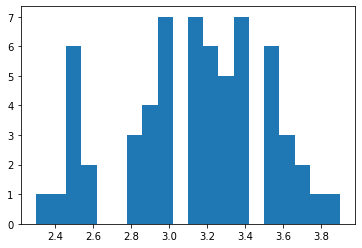

In [64]:
plt.hist(mydata['GPA'], bins=20)

GPA does not follow normal distribution curve

(array([ 1.,  5.,  0.,  2.,  2., 12.,  1.,  5.,  2., 10.,  9.,  0.,  8.,
         0.,  1.,  0.,  1.,  0.,  0.,  3.]),
 array([25.  , 27.75, 30.5 , 33.25, 36.  , 38.75, 41.5 , 44.25, 47.  ,
        49.75, 52.5 , 55.25, 58.  , 60.75, 63.5 , 66.25, 69.  , 71.75,
        74.5 , 77.25, 80.  ]),
 <a list of 20 Patch objects>)

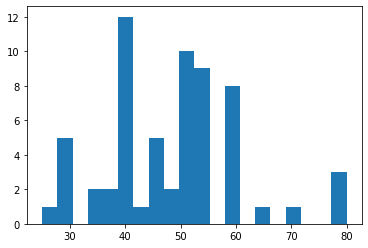

In [65]:
plt.hist(mydata['Salary'], bins=20)

Salary does not follow normal distribution curve

(array([ 1.,  5.,  2., 11.,  7.,  2., 16.,  9.,  3.,  2.,  0.,  0.,  1.,
         1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 100.,  165.,  230.,  295.,  360.,  425.,  490.,  555.,  620.,
         685.,  750.,  815.,  880.,  945., 1010., 1075., 1140., 1205.,
        1270., 1335., 1400.]),
 <a list of 20 Patch objects>)

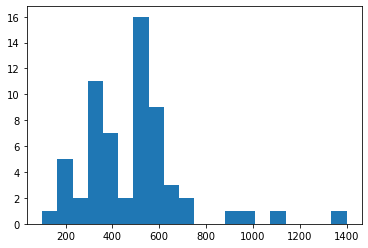

In [66]:
plt.hist(mydata['Spending'], bins=20)

Spending does not follow normal distribution curve

(array([ 5.,  9., 10.,  6.,  6.,  2., 10.,  2.,  2.,  0.,  0.,  3.,  0.,
         2.,  0.,  2.,  1.,  1.,  0.,  1.]),
 array([  0.,  45.,  90., 135., 180., 225., 270., 315., 360., 405., 450.,
        495., 540., 585., 630., 675., 720., 765., 810., 855., 900.]),
 <a list of 20 Patch objects>)

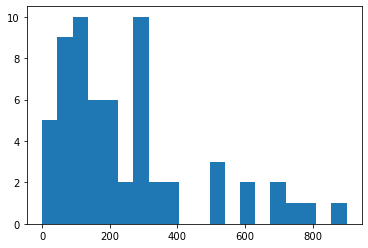

In [67]:
plt.hist(mydata['Text Messages'], bins=20)

Text Messages does not follow normal distribution curve

# 2.8.2 Write a note summarizing your conclusions.

1. Range of age for CMSU students lie between 18 to 26, where maximum students enroll at the age of 20,21,22.

2. Number of senior students are more than the junior students ; No of students in Sophomore are least

3. Female students network socially over the Male students

4. Graduate intention is more in Males than Females, though more than 50% female have grad intention

5. Around 70 % of students are employed in a Part Time job and less than 15 % of students are unemployed.

6. Retailing/Marketing	is the most prefered major and CIS is the least prefered major

7. Around 88 % of the students use Laptop compared to preference in desktop and tablet

8. More than 70 % students score more than GPA 3.0

# Question # 3

# An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

#The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

# Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? 
# State your conclusions clearly showing all steps.

In [118]:
data = pd.read_csv('A+&+B+shingles.csv')
data.head()
mean_A = data['A'].mean()
mean_B = data['B'].mean()
std_A =  data['A'].std()
std_B =  data['B'].std()
n_A=36
n_B=31
print('Mean of A {}'.format(mean_A))
print('Mean of B {}'.format(mean_B))
print('Std of A {}'.format(std_A))
print('Std of B {}'.format(std_A))

Mean of A 0.3166666666666666
Mean of B 0.2735483870967742
Std of A 0.13573082605973166
Std of B 0.13573082605973166


####  Step 1: Define null and alternative hypotheses

In [111]:
#Ho>=0.35
#Ha<0.35

#### Step 2: Decide the significance level

In [126]:
alpha = 0.05
df=36+31-2

#### Step 3: Identify the test statistic

In [120]:
Numerator = mean_A - mean_B
Denominator = np.sqrt(((std_A**2)/n_A)+((std_B**2)/n_B))
t_statistic = Numerator/Denominator
print('test statistics is {}'.format(t_statistic))

test statistics is 1.2885080295255011


#### Step 4: Calculate the p - value and test statistic

In [128]:
pvalue = ('P_Value is T.DIST(test statistics,df,1) {}',0.8989/2)
pvalue

('P_Value is T.DIST(test statistics,df,1) {}', 0.44945)

#### Step 5: Decide to reject or accept null hypothesis

In [144]:
# p_value > 0.05 => Null hypothesis:
print (" The mean moisture content is NOT less than 0.35 pound per 100 square feet")

 The mean moisture content is NOT less than 0.35 pound per 100 square feet


# 3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [132]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
data.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


####  Step 1: Define null and alternative hypotheses

In [146]:
# Ho = Population means of shingles A & B are NOT equal
# Ha = Population means of shingles A & B are equal
# Ho = E(A) = E(B)
# Ha = E(A) not equal E(B)

#### Step 2: Decide the significance level

In [90]:
alpha = 0.05

#### Step 3: Identify the test statistic

Before the test for equality of means is performed, it is assumed that the populations have identical variances.
This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. 

#### Step 4: Calculate the p - value and test statistic

In [140]:
pvalue = ('P_Value is T.DIST(test statistics,df,1) {}',0.8989/2)
pvalue

('P_Value is T.DIST(test statistics,df,1) {}', 0.44945)

#### Step 5: Decide to reject or accept null hypothesis

In [145]:
# p_value > 0.05 => Null hypothesis:
print ("The population means for shingles A and B are NOT equal")

The population means for shingles A and B are NOT equal
